In [4]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [5]:
rest=pd.read_csv(r'C:\Users\bhatt\Downloads\RestaurantRatings\RestaurantRatings\TA_restaurants_curated.csv')

In [6]:
rest.head()

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [7]:
rest1=rest.drop(['URL_TA','ID_TA','Unnamed: 0'],axis=1)

In [8]:
rest1.head()

,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ..."
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0..."
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau..."
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o..."
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience..."


In [9]:
rest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               125527 non-null  object 
 1   City               125527 non-null  object 
 2   Cuisine Style      94176 non-null   object 
 3   Ranking            115876 non-null  float64
 4   Rating             115897 non-null  float64
 5   Price Range        77672 non-null   object 
 6   Number of Reviews  108183 non-null  float64
 7   Reviews            115911 non-null  object 
dtypes: float64(3), object(5)
memory usage: 7.7+ MB


# Identifying % of missing values 

In [10]:
numerical_nan=[feature for feature in rest1.columns if rest1[feature].isnull().sum()>1 and rest1[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values
for feature in numerical_nan:
    print("{}: {}% missing value".format(feature,np.around(rest1[feature].isnull().mean(),2)))

Ranking: 0.08% missing value
Rating: 0.08% missing value
Number of Reviews: 0.14% missing value


In [11]:
numerical_nan1=[feature for feature in rest1.columns if rest1[feature].isnull().sum()>1 and rest1[feature].dtypes=='O']

## We will print the numerical nan variables and percentage of missing values
for feature in numerical_nan1:
    print("{}: {}% missing value".format(feature,np.around(rest1[feature].isnull().mean(),2)))

Cuisine Style: 0.25% missing value
Price Range: 0.38% missing value
Reviews: 0.08% missing value


Replacing the missing values with median since the distribution is skewed as seen in the visualisation below 

In [12]:
rest1['Ranking'] = rest1['Ranking'].fillna(rest1['Ranking'].median())
rest1['Rating'] = rest1['Rating'].fillna(rest1['Rating'].median())
rest1['Number of Reviews'] = rest1['Number of Reviews'].fillna(rest1['Number of Reviews'].median())

In [13]:
rest1.isna().sum()

Name                     0
City                     0
Cuisine Style        31351
Ranking                  0
Rating                   0
Price Range          47855
Number of Reviews        0
Reviews               9616
dtype: int64

In [14]:
rest1.shape 

(125527, 8)

Label Encoding of the cateogorical variables 

In [15]:
from sklearn.preprocessing import LabelEncoder
rest1['Cuisine Style']= rest1['Cuisine Style'].astype(str)
lb_make = LabelEncoder()
rest1['Cuisine Style1'] = lb_make.fit_transform(rest1['Cuisine Style'])
#rest1[['Cuisine Style', 'Cuisine Style1']].head(11)

In [16]:
rest1['Price Range']= rest1['Price Range'].astype(str)
lb_make = LabelEncoder()
rest1['Price Range1'] = lb_make.fit_transform(rest1['Price Range'])
#rest1[['Price Range', 'Price Range1']].head(11)

In [17]:
rest1.head()

,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,Cuisine Style1,Price Range1
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",9487,1
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",6739,2
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",16582,2
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",9647,2
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",6723,2


In [18]:
rest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               125527 non-null  object 
 1   City               125527 non-null  object 
 2   Cuisine Style      125527 non-null  object 
 3   Ranking            125527 non-null  float64
 4   Rating             125527 non-null  float64
 5   Price Range        125527 non-null  object 
 6   Number of Reviews  125527 non-null  float64
 7   Reviews            115911 non-null  object 
 8   Cuisine Style1     125527 non-null  int32  
 9   Price Range1       125527 non-null  int32  
dtypes: float64(3), int32(2), object(5)
memory usage: 8.6+ MB


In [19]:
rest1=rest1.drop(['Cuisine Style','Price Range'],axis=1)

In [20]:
rest1.head()

,Name,City,Ranking,Rating,Number of Reviews,Reviews,Cuisine Style1,Price Range1
0,Martine of Martine's Table,Amsterdam,1.0,5.0,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",9487,1
1,De Silveren Spiegel,Amsterdam,2.0,4.5,812.0,"[['Great food and staff', 'just perfect'], ['0...",6739,2
2,La Rive,Amsterdam,3.0,4.5,567.0,"[['Satisfaction', 'Delicious old school restau...",16582,2
3,Vinkeles,Amsterdam,4.0,5.0,564.0,"[['True five star dinner', 'A superb evening o...",9647,2
4,Librije's Zusje Amsterdam,Amsterdam,5.0,4.5,316.0,"[['Best meal.... EVER', 'super food experience...",6723,2


# Data Visualization

Text(0, 0.5, 'No. of restaurants')

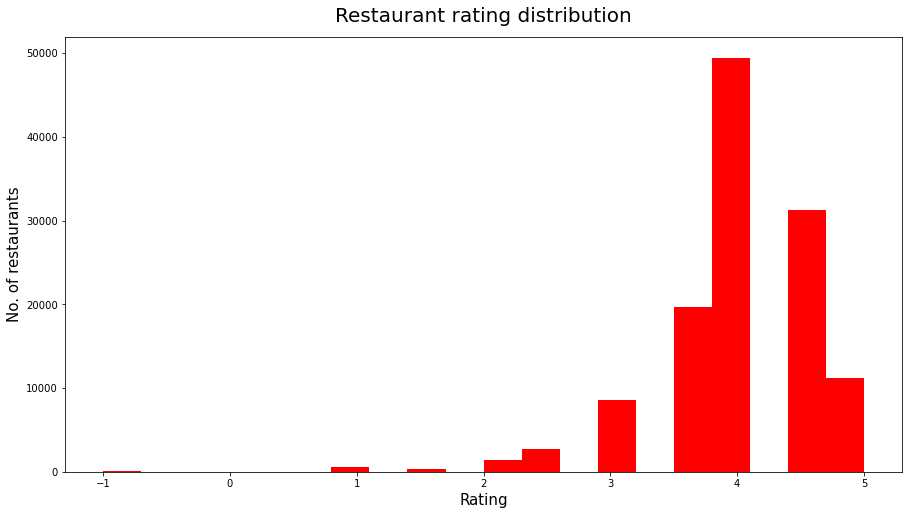

In [21]:
plt.figure(figsize=(15,8))
Rating = rest1['Rating']
plt.hist(Rating,bins=20,color="red")
plt.title('Restaurant rating distribution', size = 20, pad = 15)
plt.xlabel('Rating',size = 15)
plt.ylabel('No. of restaurants',size = 15)

Text(0, 0.5, 'No. of restaurants')

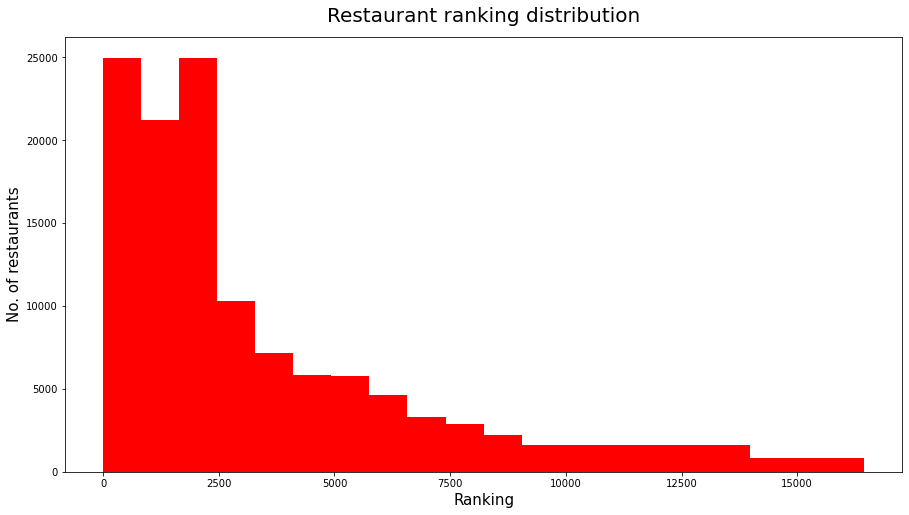

In [22]:
plt.figure(figsize=(15,8))
Ranking = rest1['Ranking']
plt.hist(Ranking,bins=20,color="red")
plt.title('Restaurant ranking distribution', size = 20, pad = 15)
plt.xlabel('Ranking',size = 15)
plt.ylabel('No. of restaurants',size = 15)

Text(0, 0.5, 'Number of Reviews')

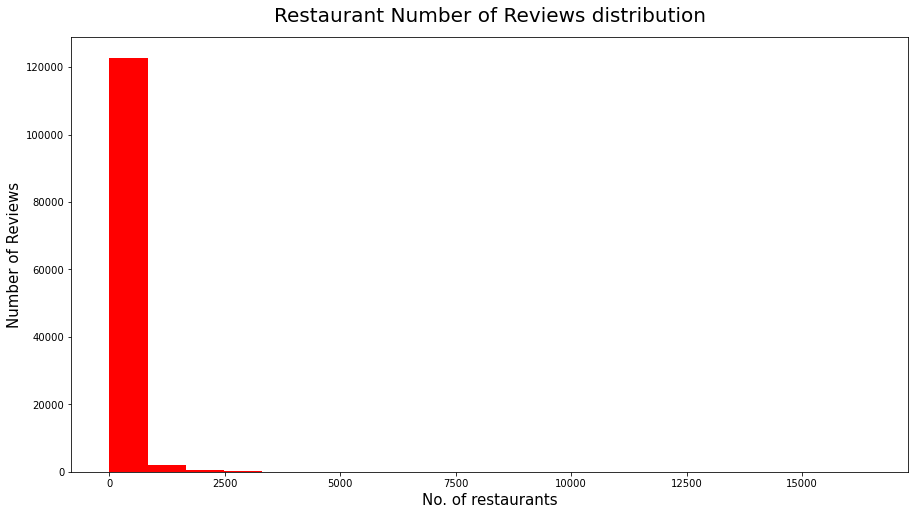

In [23]:

plt.figure(figsize=(15,8))
Reviews = rest1['Number of Reviews']
plt.hist(Reviews,bins=20,color="red")
plt.title('Restaurant Number of Reviews distribution', size = 20, pad = 15)
plt.xlabel('No. of restaurants',size = 15)
plt.ylabel('Number of Reviews',size = 15)

# Correlation Matrix

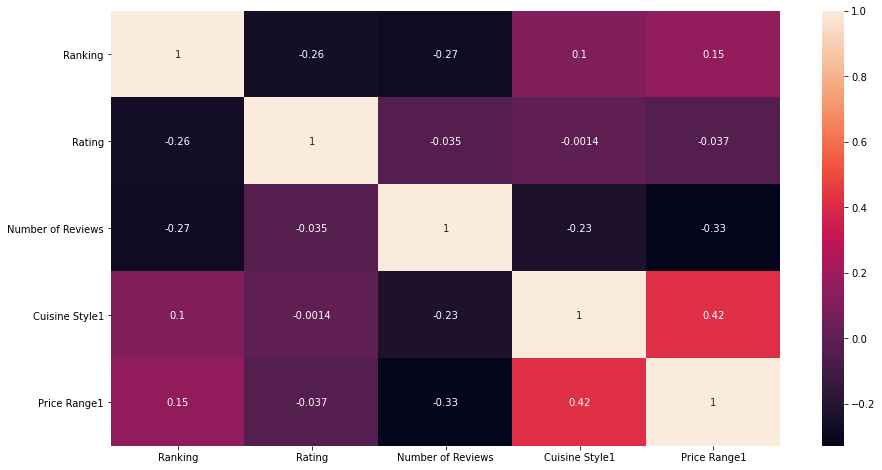

In [25]:
corr = rest1.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

Drpping of name , city and Reviews since they are highly correlated as seen from the heat map

In [26]:
rest1=rest1.drop(['Name','City', 'Reviews'],axis=1)

In [36]:
rest1.head()
rest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Ranking            125527 non-null  float64
 1   Rating             125527 non-null  float64
 2   Number of Reviews  125527 non-null  float64
 3   Cuisine Style1     125527 non-null  int32  
 4   Price Range1       125527 non-null  int32  
dtypes: float64(3), int32(2)
memory usage: 3.8 MB


In [46]:
#changing the data of dependent feature 

rest1['Rating'].unique()
rest1['Rating']= rest1['Rating'].astype(int)
rest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Ranking            125527 non-null  float64
 1   Rating             125527 non-null  int32  
 2   Number of Reviews  125527 non-null  float64
 3   Cuisine Style1     125527 non-null  int32  
 4   Price Range1       125527 non-null  int32  
dtypes: float64(2), int32(3)
memory usage: 3.4 MB


In [47]:
#changing into dependent and independent feature 
x = rest1.iloc[:,[0,2,3,4]]
y = rest1['Rating']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Ranking            125527 non-null  float64
 1   Rating             125527 non-null  float64
 2   Number of Reviews  125527 non-null  float64
 3   Cuisine Style1     125527 non-null  int32  
 4   Price Range1       125527 non-null  int32  
dtypes: float64(3), int32(2)
memory usage: 3.8 MB


In [48]:
#spilitting the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.30,random_state=105)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
x_train.head()

,Ranking,Number of Reviews,Cuisine Style1,Price Range1
82913,5994.0,111.0,12789,1
9591,4220.0,4.0,20971,3
80115,3195.0,38.0,20971,3
103884,2256.0,32.0,6263,3
54623,9052.0,2.0,11648,3


In [51]:
y_train.head()

82913     2
9591      5
80115     3
103884    4
54623     5
Name: Rating, dtype: int32

In [52]:
#Using decision tree classifier 
clf = DecisionTreeClassifier()

In [53]:
# fitting the data into the model
clf = clf.fit(x_train,y_train)

In [55]:
y_pred = clf.predict(x_test)

In [56]:
from sklearn import metrics

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6451313099126371


In [58]:
from sklearn.ensemble import RandomForestClassifier
# using Random Forest Classifier now

In [60]:
clf1=RandomForestClassifier(n_estimators=100)

In [62]:
clf1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
y_pred1=clf1.predict(x_test)

In [76]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.7039751453835736
